In [ ]:
# Importing libraries :-

import numpy as np
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
#forregular expressions
import re
#for handling string
import string
#for mathmatical operations
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import sklearn.metrics as metrics
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV

In [2]:
#Loading data(Read data as dataframe) :-
df=pd.read_csv("C:/Users/Amruta/Desktop/DBDA/Project/Dataset_for _Amazon products/dataset.csv")

#Extracting important columns from dataset :-
df=df[['userId','productId','reviews_rating','name',]]
print("shape of data",df.shape)

#for checking rows and columns of the dataset
#print("shape of data",df.shape)


shape of data (34660, 4)


In [3]:
df.head()

,userId,productId,reviews_rating,name
0,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
1,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
2,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
3,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,4.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
4,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,5.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."


In [4]:
#To check datatype of each attributes :-
df.dtypes

userId             object
productId          object
reviews_rating    float64
name               object
dtype: object

In [5]:
#Unique userId and productID :-
unique_userId = df['userId'].nunique()
unique_productId = df['productId'].nunique()
print('Total number of unique Users    : ', unique_userId)
print('Total number of unique Products : ', unique_productId)

Total number of unique Users    :  42
Total number of unique Products :  41


In [6]:
#Checking for NA values :-
df.isnull().sum()

userId               0
productId            2
reviews_rating      33
name              6760
dtype: int64

In [7]:
#Removing NA values
df.dropna(inplace=True)
df.isnull().sum()

#boolean check
#df.isna().any()

userId            0
productId         0
reviews_rating    0
name              0
dtype: int64

In [8]:
#Conversion of userId and productId: object to string
df.userId = df.userId.astype('str')
df.productId = df.productId.astype('str')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27866 entries, 0 to 27899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId          27866 non-null  object 
 1   productId       27866 non-null  object 
 2   reviews_rating  27866 non-null  float64
 3   name            27866 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


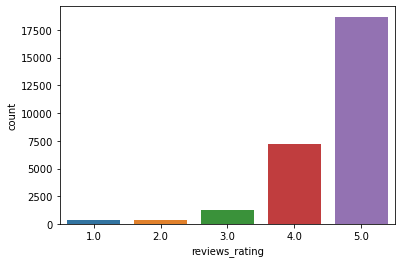

In [12]:
sns.countplot(df.reviews_rating)

In [13]:

ratings = pd.DataFrame(df.groupby('productId')['reviews_rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('productId')['reviews_rating'].count())
ratings.head()


,reviews_rating,Number_Of_Ratings
productId,,
B005PB2T0S,4.000000,5
B005PB2T2Q,3.666667,6
B00DU15MU4,5.000000,1
B00IOY8XWQ,4.729310,580
B00IOYAM4I,4.862745,51


Text(0.5, 1.0, 'Distribution of Ratings')

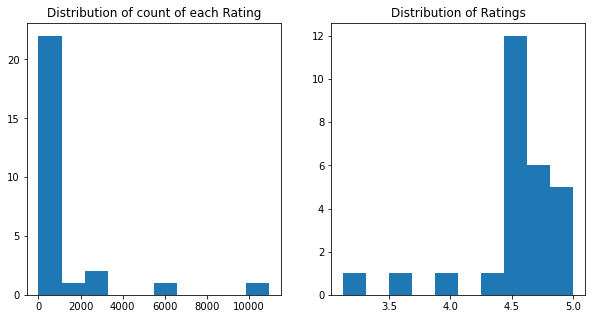

In [14]:
#Distribution of count of ratings and the mean ratings :-

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings)
plt.title('Distribution of count of each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.reviews_rating)
plt.title('Distribution of Ratings')

In [15]:
ratings.describe()

,reviews_rating,Number_Of_Ratings
count,27.000000,27.000000
mean,4.537801,1032.074074
std,0.396857,2398.577654
min,3.125000,1.000000
25%,4.500000,7.500000
50%,4.588608,51.000000
75%,4.714655,491.000000
max,5.000000,10966.000000


In [16]:

Q1 = np.percentile(ratings['Number_Of_Ratings'],25)
Q3 = np.percentile(ratings['Number_Of_Ratings'],75)
IQR = Q3-Q1
UL = Q3+1.5*IQR   #UL is used for upper whisker(highest point is less than 12)
Outliers = ratings[ratings['Number_Of_Ratings']>UL]['Number_Of_Ratings']
Outliers.shape



(5,)

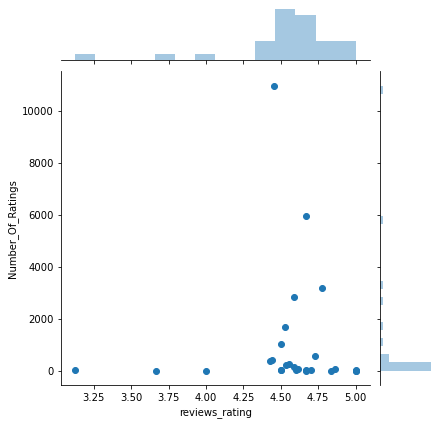

In [17]:
sns.jointplot(ratings.reviews_rating, ratings.Number_Of_Ratings)

In [18]:
counts = df.userId.value_counts()
counts.sort_values(ascending=True).head()


AVpff7_VilAPnD_xc1E_    1
AVzvXXxbvKc47QAVfRhy    3
AVpe9CMS1cnluZ0-aoC5    5
AVqVGZN9QMlgsOJE6eUZ    6
AVpg3q4RLJeJML43TxA_    6
Name: userId, dtype: int64

In [19]:
#Drop users who have rated less than 25 times :-

df = df[df['userId'].isin(counts[counts >= 25].index)]
df.shape


(27769, 4)

In [20]:
df.tail()


,userId,productId,reviews_rating,name
27895,AVpfl8cLLJeJML43AE3S,B00L9EPT8O,5.0,New Amazon Kindle Fire Hd 9w Powerfast Adapter...
27896,AVpfl8cLLJeJML43AE3S,B00L9EPT8O,5.0,New Amazon Kindle Fire Hd 9w Powerfast Adapter...
27897,AVpfl8cLLJeJML43AE3S,B00L9EPT8O,4.0,New Amazon Kindle Fire Hd 9w Powerfast Adapter...
27898,AVpfl8cLLJeJML43AE3S,B00L9EPT8O,3.0,New Amazon Kindle Fire Hd 9w Powerfast Adapter...
27899,AVpfl8cLLJeJML43AE3S,B00L9EPT8O,5.0,New Amazon Kindle Fire Hd 9w Powerfast Adapter...


Text(0.5, 1.0, 'Distribution of Ratings')

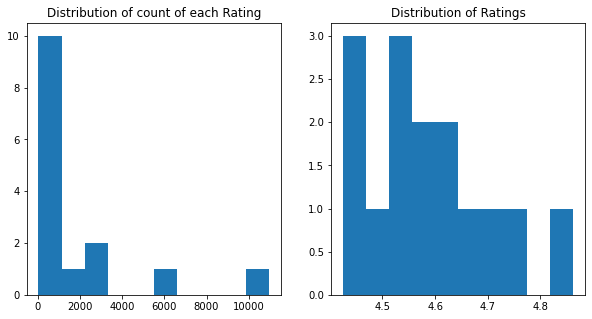

In [21]:
ratings = pd.DataFrame(df.groupby('productId')['reviews_rating'].mean())
ratings['Number_Of_Ratings'] = pd.DataFrame(df.groupby('productId')['reviews_rating'].count())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings)
plt.title('Distribution of count of each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.reviews_rating)
plt.title('Distribution of Ratings')

In [22]:
ratings.Number_Of_Ratings.value_counts(normalize=True)

270      0.066667
2814     0.066667
5948     0.066667
10966    0.066667
1685     0.066667
372      0.066667
51       0.066667
402      0.066667
30       0.066667
212      0.066667
1038     0.066667
3176     0.066667
580      0.066667
67       0.066667
158      0.066667
Name: Number_Of_Ratings, dtype: float64

In [23]:
counts = df.userId.value_counts()
counts.sort_values(ascending=True).head()


AVqkIdntQMlgsOJE6fuB     30
AVpftoij1cnluZ0-p5n2     51
AVqVGZO3nnc1JgDc3jGK     67
AVqkIiKWnnc1JgDc3khH    158
AVqVGZNvQMlgsOJE6eUY    212
Name: userId, dtype: int64

In [24]:
#Converting the dataframe to format supported by surprise package

from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(df[['userId','productId','reviews_rating']], reader)


In [25]:
trainset, testset = train_test_split(data, test_size=0.25)


In [26]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)


In [27]:
from surprise import accuracy
accuracy.rmse(predictions)


RMSE: 0.7287


0.7286897564596861

In [29]:
#Reading result of SVD in pandas :-
results = pd.DataFrame({'SVD':[0.7287]},index=['RMSE'])
results


,SVD
RMSE,0.7287


In [30]:

from collections import defaultdict
def get_top_n(predictions, n=5):
    # Map predictions to each other.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid,est))
        
    # sort predictiond for each other and retrieve the k highest one
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

    

In [31]:
top_n = get_top_n(predictions, n=5)
top_n


defaultdict(list,
            {'AVpjEN4jLJeJML43rpUe': [('B018Y225IA', 4.482319550815914),
              ('B018Y225IA', 4.482319550815914),
              ('B018Y225IA', 4.482319550815914),
              ('B018Y225IA', 4.482319550815914),
              ('B018Y225IA', 4.482319550815914)],
             'AVphgVaX1cnluZ0-DR74': [('B018Y229OU', 4.510864415167586),
              ('B018Y229OU', 4.510864415167586),
              ('B018Y229OU', 4.510864415167586),
              ('B018Y229OU', 4.510864415167586),
              ('B018Y229OU', 4.510864415167586)],
             'AVqkIiKWnnc1JgDc3khH': [('B01AHB9CYG', 4.57614848196226),
              ('B01AHB9CYG', 4.57614848196226),
              ('B01AHB9CYG', 4.57614848196226),
              ('B01AHB9CYG', 4.57614848196226),
              ('B01AHB9CYG', 4.57614848196226)],
             'AVqVGWLKnnc1JgDc3jF1': [('B018Y23MNM', 4.598573853680356),
              ('B018Y23MNM', 4.598573853680356),
              ('B018Y23MNM', 4.598573853680356),
      

In [32]:
#Getting the recommended items for each user

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    

AVpjEN4jLJeJML43rpUe ['B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA']
AVphgVaX1cnluZ0-DR74 ['B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU']
AVqkIiKWnnc1JgDc3khH ['B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG']
AVqVGWLKnnc1JgDc3jF1 ['B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM']
AV1YnRtnglJLPUi8IJmV ['B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM']
AVphPmHuilAPnD_x3E5h ['B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ']
AVpfl8cLLJeJML43AE3S ['B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O']
AVqkIhwDv8e3D1O-lebb ['B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2']
AVqVGWQDv8e3D1O-ldFr ['B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK']
AVqVGZNvQMlgsOJE6eUY ['B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2']
AVqVGZO3nnc1JgDc3jGK ['B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B

In [33]:
# GridSearch :-

param_grid = {
    "n_epochs":[10,15,20],
    "lr_all":[0.03,0.04,0.05],
    "reg_all":[0.04,0.05,0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])


0.7390003862343114
{'n_epochs': 10, 'lr_all': 0.03, 'reg_all': 0.6}


In [36]:
algo = SVD(n_epochs= 10, lr_all=0.03, reg_all=0.6)
algo.fit(trainset)

predictions = algo.test(testset)
accuracy.rmse(predictions)


RMSE: 0.7391


0.7391409809616457

In [37]:
results['SVD_tuned']=[0.7391]
results

,SVD,SVD_tuned
RMSE,0.7287,0.7391


In [38]:
# Top 5 recommendations per user :-

top_n = get_top_n(predictions, n=5)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _)in user_ratings])
    

AVpjEN4jLJeJML43rpUe ['B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA']
AVphgVaX1cnluZ0-DR74 ['B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU']
AVqkIiKWnnc1JgDc3khH ['B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG']
AVqVGWLKnnc1JgDc3jF1 ['B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM']
AV1YnRtnglJLPUi8IJmV ['B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM']
AVphPmHuilAPnD_x3E5h ['B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ']
AVpfl8cLLJeJML43AE3S ['B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O']
AVqkIhwDv8e3D1O-lebb ['B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2']
AVqVGWQDv8e3D1O-ldFr ['B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK']
AVqVGZNvQMlgsOJE6eUY ['B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2']
AVqVGZO3nnc1JgDc3jGK ['B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B

In [39]:
from surprise import KNNWithMeans
algo = KNNWithMeans(k=10, sim_options={'name':'cosine', 'user_based':True})   #k=25
algo.fit(trainset)
test_pred = algo.test(testset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [40]:
#get RMSE

print("User-based Model:Test set")
accuracy.rmse(test_pred, verbose=True)


User-based Model:Test set
RMSE: 0.7444


0.744411218881783

In [41]:
results['User-User_CF']=[0.7444]
results

,SVD,SVD_tuned,User-User_CF
RMSE,0.7287,0.7391,0.7444


In [42]:
#Top 5 recommendation per user :-

top_n = get_top_n(test_pred, n=5)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _)in user_ratings])
    


AVpjEN4jLJeJML43rpUe ['B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA']
AVphgVaX1cnluZ0-DR74 ['B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU']
AVqkIiKWnnc1JgDc3khH ['B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG']
AVqVGWLKnnc1JgDc3jF1 ['B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM']
AV1YnRtnglJLPUi8IJmV ['B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM']
AVphPmHuilAPnD_x3E5h ['B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ']
AVpfl8cLLJeJML43AE3S ['B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O']
AVqkIhwDv8e3D1O-lebb ['B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2']
AVqVGWQDv8e3D1O-ldFr ['B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK']
AVqVGZNvQMlgsOJE6eUY ['B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2']
AVqVGZO3nnc1JgDc3jGK ['B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B

In [43]:
# Let's tune the model and see if we can get the better results :

sim_options = {
    "name": ["msd","cosine","pearson_baseline"],
        "min_support": [25,50,75],
    "user_based" :[True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix.

In [44]:
algo = KNNWithMeans(k=25, sim_options={'name':'msd','user_based':True})
algo.fit(trainset)
test_pred = algo.test(testset)

#To get RMSE :
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
User-based Model : Test Set
RMSE: 0.7431


0.7431327935440333

In [45]:
results['User-User_CF_Tuned']=[0.7431]
results


,SVD,SVD_tuned,User-User_CF,User-User_CF_Tuned
RMSE,0.7287,0.7391,0.7444,0.7431


In [46]:
#Top 5 recommendation per user 
top_n = get_top_n(test_pred, n=5)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _)in user_ratings])
    

AVpjEN4jLJeJML43rpUe ['B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA', 'B018Y225IA']
AVphgVaX1cnluZ0-DR74 ['B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU', 'B018Y229OU']
AVqkIiKWnnc1JgDc3khH ['B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG', 'B01AHB9CYG']
AVqVGWLKnnc1JgDc3jF1 ['B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM', 'B018Y23MNM']
AV1YnRtnglJLPUi8IJmV ['B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM', 'B00OQVZDJM']
AVphPmHuilAPnD_x3E5h ['B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ', 'B00IOY8XWQ']
AVpfl8cLLJeJML43AE3S ['B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O', 'B00L9EPT8O']
AVqkIhwDv8e3D1O-lebb ['B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2']
AVqVGWQDv8e3D1O-ldFr ['B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK', 'B018SZT3BK']
AVqVGZNvQMlgsOJE6eUY ['B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2', 'B00ZV9PXP2']
AVqVGZO3nnc1JgDc3jGK ['B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B00VINDBJK', 'B

In [47]:
#Generate matrix table

ratings_matrix = df.pivot_table(index='userId', columns='productId', values='reviews_rating').fillna(0)
userId = ratings_matrix.index
ProductId = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(15, 15)


productId,B00IOY8XWQ,B00IOYAM4I,B00L9EPT8O,B00OQVZDJM,B00TSUGXKE,B00VINDBJK,B00ZV9PXP2,B018SZT3BK,B018Y225IA,B018Y229OU,B018Y23MNM,B01AHB9CN2,B01AHB9CYG,B01BFIBRIE,B01J2G4VBG
userId,,,,,,,,,,,,,,,
AV1YnR7wglJLPUi8IJmi,0.00000,0.000000,0.000000,0.000000,4.424731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YnRtnglJLPUi8IJmV,0.00000,0.000000,0.000000,4.772355,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfl8cLLJeJML43AE3S,0.00000,0.000000,4.670982,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpftoij1cnluZ0-p5n2,0.00000,4.862745,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVphPmHuilAPnD_x3E5h,4.72931,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
ratings.sort_values('Number_Of_Ratings', ascending=False).head(20)


,reviews_rating,Number_Of_Ratings
productId,,
B018Y229OU,4.454222,10966
B00L9EPT8O,4.670982,5948
B00OQVZDJM,4.772355,3176
B01AHB9CN2,4.586709,2814
B018Y23MNM,4.527003,1685
B018Y225IA,4.504817,1038
B00IOY8XWQ,4.729310,580
B01J2G4VBG,4.440299,402
B00TSUGXKE,4.424731,372


In [49]:
#Lets choose product 1400532655 and store its tarings in a series

ProdID_ratings=ratings_matrix['B00L9EPT8O']

In [50]:
#We can find the correlation between this and matrix with all product ratings

Similar_to_prod_rating=ratings_matrix.corrwith(ProdID_ratings)

In [51]:
cor_with_prod=pd.DataFrame(Similar_to_prod_rating,columns=['Corelation']).sort_values('Corelation', ascending=False)
cor_with_prod.head(11)


,Corelation
productId,
B00L9EPT8O,1.000000
B00TSUGXKE,-0.071429
B018Y23MNM,-0.071429
B01BFIBRIE,-0.071429
B00IOY8XWQ,-0.071429
B00OQVZDJM,-0.071429
B018Y225IA,-0.071429
B00VINDBJK,-0.071429
B01AHB9CN2,-0.071429


In [52]:
df.columns


Index(['userId', 'productId', 'reviews_rating', 'name'], dtype='object')

In [53]:
#Popalarity based recommendation :-
df.groupby('productId')['reviews_rating'].mean().head()


productId
B00IOY8XWQ    4.729310
B00IOYAM4I    4.862745
B00L9EPT8O    4.670982
B00OQVZDJM    4.772355
B00TSUGXKE    4.424731
Name: reviews_rating, dtype: float64

In [54]:
df.groupby('productId')['reviews_rating'].mean().sort_values(ascending=False).head()


productId
B00IOYAM4I    4.862745
B00OQVZDJM    4.772355
B00IOY8XWQ    4.729310
B00L9EPT8O    4.670982
B00VINDBJK    4.611940
Name: reviews_rating, dtype: float64

In [55]:
df.groupby('productId')['reviews_rating'].count().sort_values(ascending=False).head()  


productId
B018Y229OU    10966
B00L9EPT8O     5948
B00OQVZDJM     3176
B01AHB9CN2     2814
B018Y23MNM     1685
Name: reviews_rating, dtype: int64

In [56]:

ratings_mean_count = pd.DataFrame(df.groupby('productId')['reviews_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('productId')['reviews_rating'].count())
ratings_mean_count.head()

,reviews_rating,rating_counts
productId,,
B00IOY8XWQ,4.729310,580
B00IOYAM4I,4.862745,51
B00L9EPT8O,4.670982,5948
B00OQVZDJM,4.772355,3176
B00TSUGXKE,4.424731,372


In [57]:

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.20, random_state=0)
train_data.head()


,userId,productId,reviews_rating,name
13209,AVphgVaX1cnluZ0-DR74,B018Y229OU,5.0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes..."
23235,AVpfl8cLLJeJML43AE3S,B00L9EPT8O,5.0,"Echo (White),,,\r\nEcho (White),,,"
19961,AV1YnRtnglJLPUi8IJmV,B00OQVZDJM,5.0,Amazon Kindle Paperwhite - eBook reader - 4 GB...
16177,AVqVGWLKnnc1JgDc3jF1,B018Y23MNM,5.0,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16..."
21315,AVqVGWQDv8e3D1O-ldFr,B018SZT3BK,5.0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes..."


In [69]:
#Count of user_id for each unique song as recommendation score 

train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,B00IOY8XWQ,465
1,B00IOYAM4I,39
2,B00L9EPT8O,4723
3,B00OQVZDJM,2545
4,B00TSUGXKE,296


In [70]:

#Generate matrix table
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

df.duplicated(subset = None, keep = 'first')


0        False
3        False
117      False
126      False
222      False
         ...  
27891    False
27893    False
27894    False
27897    False
27899    False
Length: 170, dtype: bool

In [74]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
9,B018Y229OU,8785,1.0
2,B00L9EPT8O,4723,2.0
3,B00OQVZDJM,2545,3.0
11,B01AHB9CN2,2271,4.0
10,B018Y23MNM,1333,5.0


In [75]:
# Recommendations for any random user using the model

# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [76]:
test_data.head()


,userId,productId,reviews_rating,name
1781,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,4.0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
23223,AVpfl8cLLJeJML43AE3S,B00L9EPT8O,5.0,"Echo (White),,,\r\nEcho (White),,,"
20928,AVphPmHuilAPnD_x3E5h,B00IOY8XWQ,5.0,"Kindle Voyage E-reader, 6 High-Resolution Disp..."
5169,AVphgVaX1cnluZ0-DR74,B018Y229OU,4.0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes..."
16836,AVqVGWLKnnc1JgDc3jF1,B018Y23MNM,4.0,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16..."


In [77]:
test_data.index


Int64Index([ 1781, 23223, 20928,  5169, 16836, 11923, 26545, 19823,  6272,
            17043,
            ...
            13270, 19266,  5073, 25334, 19183, 26645, 20208, 22819, 18731,
             4014],
           dtype='int64', length=5554)

In [78]:
find_recom = test_data.index   # This list is user choice.
for i in find_recom:
    
    print(recommend(i))    
    print("\n") 

    userId   productId  score  Rank
9     1781  B018Y229OU   8785   1.0
2     1781  B00L9EPT8O   4723   2.0
3     1781  B00OQVZDJM   2545   3.0
11    1781  B01AHB9CN2   2271   4.0
10    1781  B018Y23MNM   1333   5.0


    userId   productId  score  Rank
9    23223  B018Y229OU   8785   1.0
2    23223  B00L9EPT8O   4723   2.0
3    23223  B00OQVZDJM   2545   3.0
11   23223  B01AHB9CN2   2271   4.0
10   23223  B018Y23MNM   1333   5.0


    userId   productId  score  Rank
9    20928  B018Y229OU   8785   1.0
2    20928  B00L9EPT8O   4723   2.0
3    20928  B00OQVZDJM   2545   3.0
11   20928  B01AHB9CN2   2271   4.0
10   20928  B018Y23MNM   1333   5.0


    userId   productId  score  Rank
9     5169  B018Y229OU   8785   1.0
2     5169  B00L9EPT8O   4723   2.0
3     5169  B00OQVZDJM   2545   3.0
11    5169  B01AHB9CN2   2271   4.0
10    5169  B018Y23MNM   1333   5.0


    userId   productId  score  Rank
9    16836  B018Y229OU   8785   1.0
2    16836  B00L9EPT8O   4723   2.0
3    16836  B00OQVZD

In [79]:
results


,SVD,SVD_tuned,User-User_CF,User-User_CF_Tuned
RMSE,0.7287,0.7391,0.7444,0.7431
